<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/SLR_NewsPaper_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In order to investigate the feasibility of starting a Sunday edition for a large metropolitan newspaper,information is obtained from a sample of 34 newspapers concerning their daily and sunday circulations(in thousands).

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [ ]:
data = pd.read_csv('/content/NewspaperData.csv')

In [ ]:
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


H0 : daily is not affecting sunday

H1 : daily is affecting sunday

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


# Correlation

In [ ]:
data.drop('Newspaper', axis=1).corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<ipython-input-35-8d14b65efb14>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['daily'],kde=True)


<Axes: xlabel='daily', ylabel='Density'>

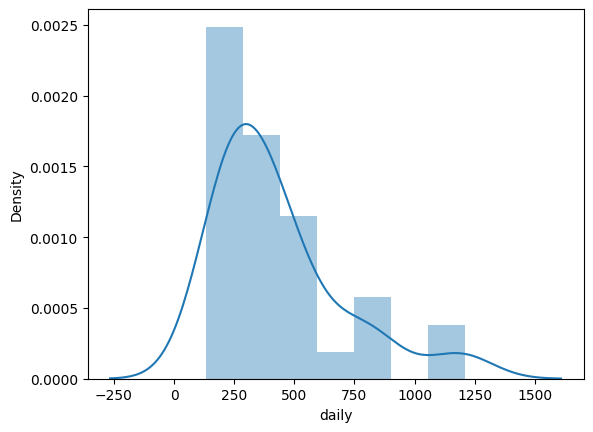

In [ ]:
sns.distplot(data['daily'],kde=True)

<ipython-input-36-caab16456bc4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sunday'],kde=True)


<Axes: xlabel='sunday', ylabel='Density'>

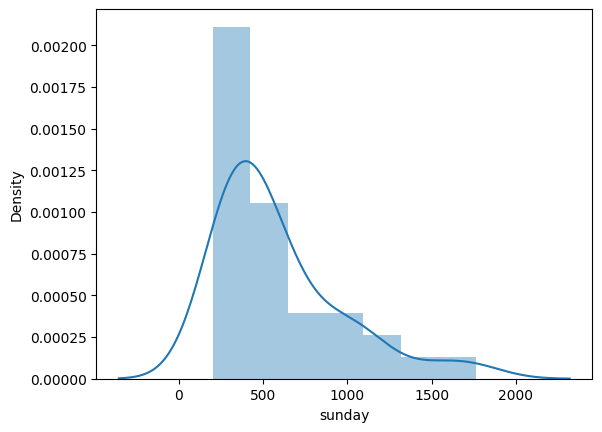

In [ ]:
sns.distplot(data['sunday'],kde=True)

<Axes: xlabel='daily', ylabel='sunday'>

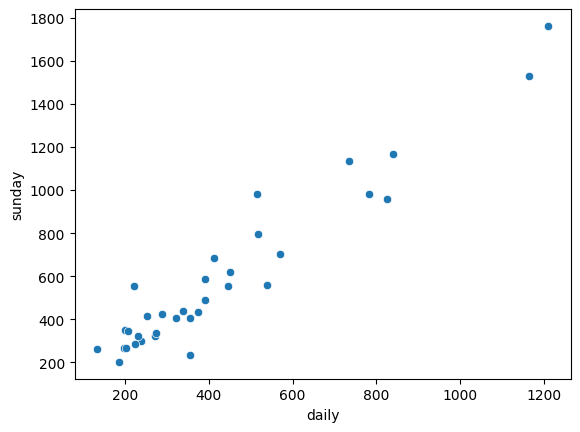

In [ ]:
sns.scatterplot(x='daily',y='sunday',data=data)

# Fitting Linear Regression Model using 'statmodels'

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols('sunday~daily',data=data).fit()       #model is learning

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           6.02e-19
Time:                        06:08:23   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='daily', ylabel='sunday'>

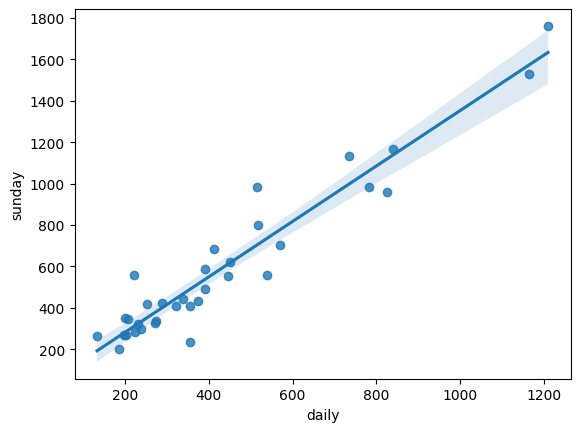

In [ ]:
#regression line
sns.regplot(x='daily',y='sunday',data=data)

In [ ]:
#checking performance of model
ypred = model.predict(data['daily'])

In [ ]:
ypred

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

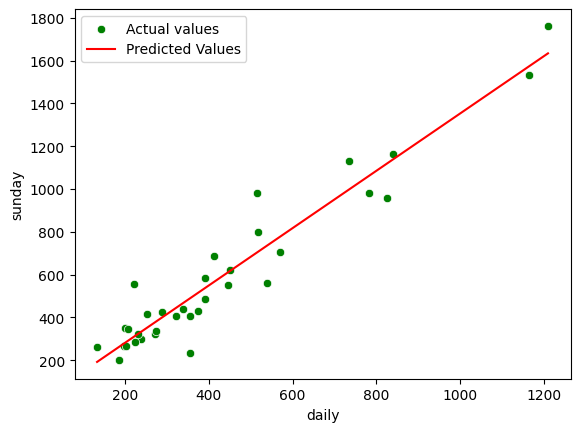

In [ ]:
sns.scatterplot(x='daily',y='sunday',data=data,label='Actual values',color='g')
sns.lineplot(x='daily',y=ypred,data=data,label='Predicted Values',color='r')
plt.legend()

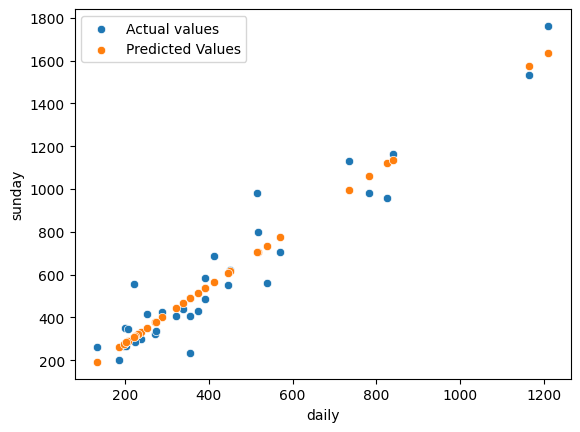

In [ ]:
sns.scatterplot(x='daily',y='sunday',data=data,label='Actual values')
sns.scatterplot(x='daily',y=ypred,data=data,label='Predicted Values')
plt.legend()

In [ ]:
#coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [ ]:
#t & p-values
print(model.tvalues, '\n' ,model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


# Conclusion -
p = 6.016802e-19  <  0.05  , So Null hypothesis rejected.Thus,'daily' is affecting 'sunday'

In [ ]:
#R-squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

# Predict for new Datapoint

In [ ]:
#Predict for 200 and 300 daily circulation
newdata = pd.Series([200,300])
newdata

0    200
1    300
dtype: int64

In [ ]:
data_pred = pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300


In [ ]:
yp = model.predict(data_pred)

In [ ]:
yp

0    281.778581
1    415.750057
dtype: float64

In [ ]:
ypred

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

In [ ]:
data['sunday']

0      488.506
1      798.298
2      235.084
3      299.451
4      559.093
5     1133.249
6      348.744
7      417.779
8      344.522
9      323.084
10     620.752
11     423.305
12     202.614
13    1531.527
14     553.479
15     685.975
16     324.241
17     983.240
18    1762.015
19     960.308
20     284.611
21     407.760
22     982.663
23     557.000
24     440.923
25     268.060
26     262.048
27     432.502
28     338.355
29     704.322
30     585.681
31     267.781
32     408.343
33    1165.567
Name: sunday, dtype: float64

In [ ]:
#residuals=error
#error=actual values - Predicted values
model.resid

0     -50.433509
1      91.855295
2    -255.191710
3     -33.980284
4    -175.214432
5     136.364174
6      68.530205
7      65.499269
8      54.431828
9      -0.462868
10      4.372959
11     22.866543
12    -60.054890
13    -42.256417
14    -55.968357
15    119.009998
16    -54.372164
17    -77.979269
18    128.162792
19   -159.478239
20    -28.983128
21    -81.464034
22    278.173599
23    247.804156
24    -25.296792
25     -9.860203
26     69.710115
27    -82.399007
28    -42.353478
29    -73.638698
30     47.633741
31    -16.489451
32    -36.379729
33     27.841980
dtype: float64